Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

In [1]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/drive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from PIL import Image 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import glob 

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset

path_dir = '/content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/'

data_dir_train = pathlib.Path(path_dir + "Train/")
data_dir_test = pathlib.Path(path_dir + "Test/")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  labels = 'inferred',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
##todo

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  labels = 'inferred',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
##todo

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

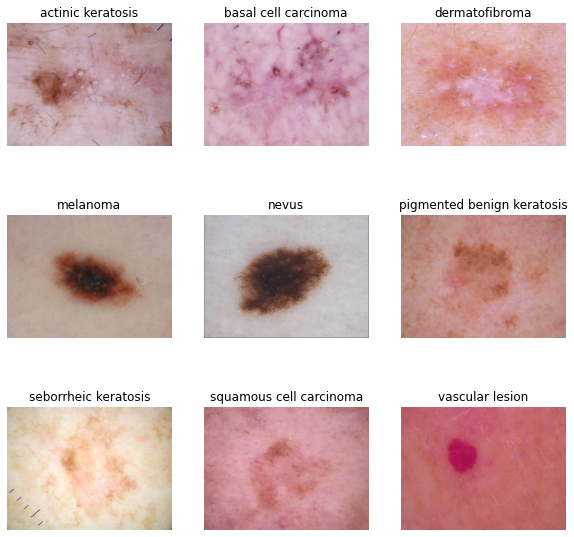

In [9]:
### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
list_pic = ['jpg','PNG']
for i in range(len(class_names)):
  inPath = path_dir +  'Train/' + class_names[i] + '/'
  for imagePath in os.listdir(inPath):
      l = imagePath.split('.')
      if l[-1] in list_pic :
          inputPath = os.path.join(inPath,imagePath)
          #print(inputPath)
          img = Image.open(inputPath)
          plt.subplot(3,3, i+1)
          plt.title(class_names[i])
          plt.imshow(img)
          plt.axis('off')
      break

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
model = Sequential([

layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height,img_width,3)),

layers.Conv2D(32,3, padding= 'same', activation='relu'),
layers.Conv2D(32,3, padding= 'same', activation='relu'),
layers.MaxPooling2D(),

layers.Conv2D(64,3, padding= 'same', activation='relu'),
layers.Conv2D(64,3, padding= 'same', activation='relu'),
layers.MaxPooling2D(),

layers.Conv2D(128,3, padding= 'same', activation='relu'),
layers.Conv2D(128,3, padding= 'same', activation='relu'),
layers.MaxPooling2D(),

layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(len(class_names))
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 180, 180, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 90, 90, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)        0

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 40s 88ms/step - loss: 1.9500 - accuracy: 0.2519 - val_loss: 1.9610 - val_accuracy: 0.1739
Epoch 2/20
169/169 [==============================] - 12s 72ms/step - loss: 1.5827 - accuracy: 0.4021 - val_loss: 2.1536 - val_accuracy: 0.2174
Epoch 3/20
169/169 [==============================] - 12s 73ms/step - loss: 1.3945 - accuracy: 0.4692 - val_loss: 1.7657 - val_accuracy: 0.3043
Epoch 4/20
169/169 [==============================] - 12s 73ms/step - loss: 1.1933 - accuracy: 0.5514 - val_loss: 2.6911 - val_accuracy: 0.2174
Epoch 5/20
169/169 [==============================] - 12s 73ms/step - loss: 0.9923 - accuracy: 0.6397 - val_loss: 2.7404 - val_accuracy: 0.2609
Epoch 6/20
169/169 [==============================] - 12s 73ms/step - loss: 0.7617 - accuracy: 0.7281 - val_loss: 3.2543 - val_accuracy: 0.2609
Epoch 7/20
169/169 [==============================] - 12s 73ms/step - loss: 0.6484 - accuracy: 0.7726 - val_loss: 4.5867 - val_accuracy:

### Visualizing training results

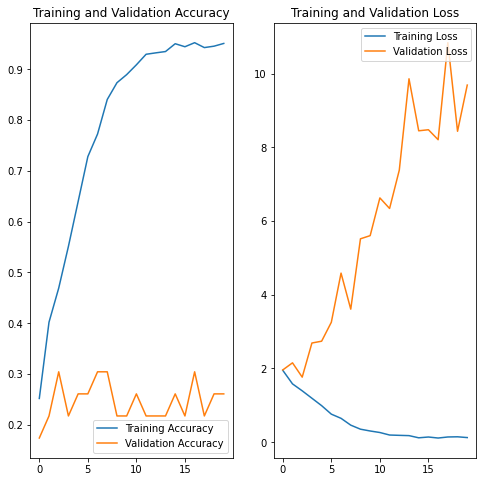

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

**We observe that the model is highly overfitted, as the train accuracy is in around 60% whereas validation accuracy is only around 20%. We can also observe that the validation loss is continuously increasing, compared to training loss, which is steadly decreasing. **

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

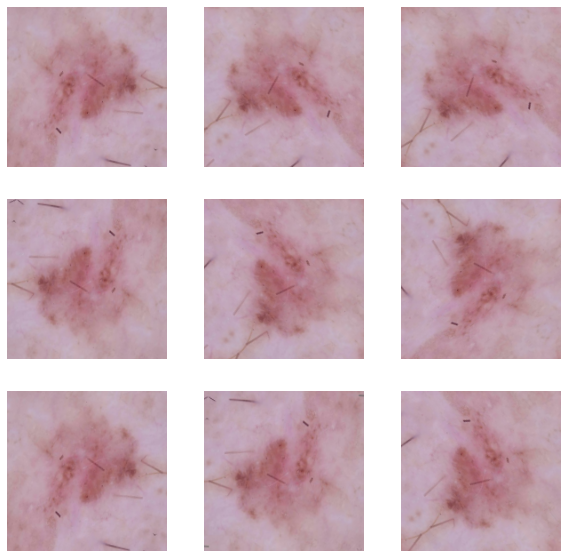

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10,10)),
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_image = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0].numpy().astype("uint8"))
    plt.axis("off")
    

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
model = Sequential([

layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height,img_width,3)),

data_augmentation,

layers.Conv2D(32,3, padding= 'same', activation='relu'),
layers.Conv2D(32,3, padding= 'same', activation='relu'),
layers.Dropout(0.2),
layers.MaxPooling2D(),

layers.Conv2D(64,3, padding= 'same', activation='relu'),
layers.Conv2D(64,3, padding= 'same', activation='relu'),
layers.Dropout(0.2),
layers.MaxPooling2D(),

layers.Conv2D(128,3, padding= 'same', activation='relu'),
layers.Conv2D(128,3, padding= 'same', activation='relu'),
layers.Dropout(0.2),
layers.MaxPooling2D(),

layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(len(class_names))
])


### Compiling the model

In [20]:
## Your code goes here
model.compile(optimizer='adam', 
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
              )

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 180, 180, 32)      9248      
_________________________________________________________________
dropout (Dropout)            (None, 180, 180, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 90, 90, 64)       

### Training the model

In [22]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20 
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
) ## your training code

Epoch 1/20
169/169 [==============================] - 16s 89ms/step - loss: 2.0622 - accuracy: 0.2068 - val_loss: 2.1658 - val_accuracy: 0.0870
Epoch 2/20
169/169 [==============================] - 15s 89ms/step - loss: 1.7341 - accuracy: 0.3377 - val_loss: 1.7832 - val_accuracy: 0.2609
Epoch 3/20
169/169 [==============================] - 15s 89ms/step - loss: 1.5688 - accuracy: 0.3874 - val_loss: 2.0462 - val_accuracy: 0.3043
Epoch 4/20
169/169 [==============================] - 15s 89ms/step - loss: 1.5146 - accuracy: 0.4063 - val_loss: 1.8571 - val_accuracy: 0.2609
Epoch 5/20
169/169 [==============================] - 15s 89ms/step - loss: 1.4655 - accuracy: 0.4271 - val_loss: 1.7747 - val_accuracy: 0.3478
Epoch 6/20
169/169 [==============================] - 15s 89ms/step - loss: 1.4439 - accuracy: 0.4408 - val_loss: 1.8738 - val_accuracy: 0.3043
Epoch 7/20
169/169 [==============================] - 15s 89ms/step - loss: 1.3954 - accuracy: 0.4494 - val_loss: 2.0007 - val_accuracy:

### Visualizing the results

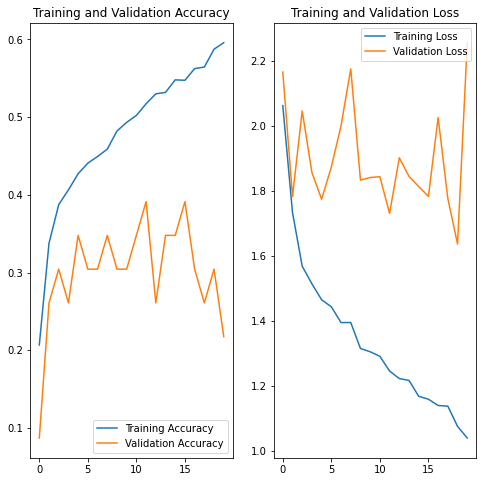

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

***The model has less overfitted compared to model 1, but its still overfitting. The train accuracy is around 55% and validation accuracy is around 35%. There is a huge gap between the loss values also ***

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [42]:
## Your code goes here.
import glob
for i in class_names:
  myPath = "/content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/Train/" + i + '/'
  tifCounter = len(glob.glob1(myPath,"*.jpg"))
  print(i,':',tifCounter)

actinic keratosis : 114
basal cell carcinoma : 376
dermatofibroma : 95
melanoma : 438
nevus : 357
pigmented benign keratosis : 462
seborrheic keratosis : 77
squamous cell carcinoma : 181
vascular lesion : 139


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
***------>seborrheic keratosis has the least samples: 77***
#### - Which classes dominate the data in terms proportionate number of samples?
***------>pigmented benign keratosis has the highest samples: 462***


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [43]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [44]:
path_to_training_dataset="/content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/Train/" 
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6EEC569290>: 100%|██████████| 500/500 [00:19<00:00, 25.66 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F6EEC77EC90>:   0%|          | 2/500 [00:00<01:11,  7.00 Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6EEC77EC90>: 100%|██████████| 500/500 [00:18<00:00, 26.51 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6EEC600D10>: 100%|██████████| 500/500 [00:19<00:00, 25.38 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F6EEC562250>: 100%|██████████| 500/500 [01:29<00:00,  5.59 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F6EEC545B50>: 100%|██████████| 500/500 [01:21<00:00,  6.16 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F6EED9158D0>: 100%|██████████| 500/500 [00:19<00:00, 25.74 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F6EED8C9C50>: 100%|██████████| 500/500 [00:40<00:00, 12.20 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6F4A8E8310>: 100%|██████████| 500/500 [00:19<00:00, 25.85 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6F4AA6D950>: 100%|██████████| 500/500 [00:18<00:00, 27.22 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [24]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [25]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','*.jpg'))]
path_list[:5]

['/content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0028076.jpg',
 '/content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026194.jpg',
 '/content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0028314.jpg',
 '/content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0029210.jpg',
 '/content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0027668.jpg']

In [26]:
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[:5]

['/content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028990.jpg_a07c108b-2f6f-4d98-ae69-158e6d3b993c.jpg',
 '/content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030142.jpg_41a1adc6-c004-40c4-9091-56c677f746f9.jpg',
 '/content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030655.jpg_de37ece1-3c6f-4300-b84f-1730b9d59648.jpg',
 '/content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029210.jpg_4578c8bb-31ca-4bd2-b83d-2edf71612abc.jpg',
 '/content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/outp

In [27]:
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list[:5]

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [28]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:5]

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [29]:
original_dict = dict(zip(path_list, lesion_list))

In [30]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))


In [31]:
original_df = pd.DataFrame(list(original_dict.items()),columns = ['Path','Label'])

In [32]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [33]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [34]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [35]:
data_dir_train="/content/drive/My Drive/CNN_melonia/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [45]:
## your code goes here
model = Sequential([

layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height,img_width,3)),

layers.Conv2D(32,3, padding= 'same', activation='relu'),
layers.Conv2D(32,3, padding= 'same', activation='relu'),
layers.Dropout(0.2),
layers.MaxPooling2D(),

layers.Conv2D(64,3, padding= 'same', activation='relu'),
layers.Conv2D(64,3, padding= 'same', activation='relu'),
layers.Dropout(0.2),
layers.MaxPooling2D(),

layers.Conv2D(128,3, padding= 'same', activation='relu'),
layers.Conv2D(128,3, padding= 'same', activation='relu'),
layers.Dropout(0.2),
layers.MaxPooling2D(),

layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(len(class_names))
])


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [41]:
## your code goes here
## Your code goes here
model.compile(optimizer='adam', 
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
              )

In [42]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 180, 180, 32)      9248      
_________________________________________________________________
dropout_9 (Dropout)          (None, 180, 180, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 90, 90, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 90, 90, 64)       

#### **Todo:**  Train your model

In [43]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
) ## your training code

Epoch 1/30
169/169 [==============================] - 43s 245ms/step - loss: 2.2111 - accuracy: 0.1432 - val_loss: 2.1863 - val_accuracy: 0.1403
Epoch 2/30
169/169 [==============================] - 42s 242ms/step - loss: 2.1749 - accuracy: 0.1645 - val_loss: 2.1549 - val_accuracy: 0.1745
Epoch 3/30
169/169 [==============================] - 42s 245ms/step - loss: 2.0855 - accuracy: 0.2090 - val_loss: 2.1467 - val_accuracy: 0.2064
Epoch 4/30
169/169 [==============================] - 42s 246ms/step - loss: 1.9672 - accuracy: 0.2326 - val_loss: 1.9723 - val_accuracy: 0.2576
Epoch 5/30
169/169 [==============================] - 42s 244ms/step - loss: 1.7057 - accuracy: 0.3409 - val_loss: 1.6897 - val_accuracy: 0.3801
Epoch 6/30
169/169 [==============================] - 42s 243ms/step - loss: 1.5337 - accuracy: 0.4165 - val_loss: 1.6542 - val_accuracy: 0.3734
Epoch 7/30
169/169 [==============================] - 43s 246ms/step - loss: 1.4230 - accuracy: 0.4457 - val_loss: 1.5137 - val_ac

#### **Todo:**  Visualize the model results

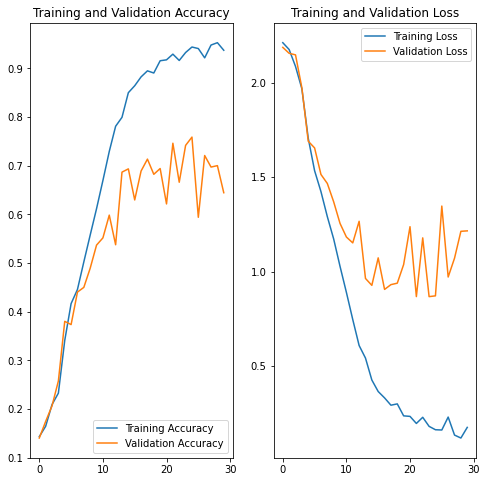

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



***The class imbalance helped the model, but still there is overfitting, training accuracy is around 90% whereas validation accuracy is around 80%. 
Both the losses are decreasing, but there is a huge gap in the values***